In [1]:
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

from scipy.integrate import odeint

from utils import lorenz_de

In [3]:
%config InlineBackend.figure_format = 'retina'
plt.rcParams['font.serif'].insert(0, 'Libertinus Serif')
plt.rcParams['font.family'] = 'serif'

In [4]:
t0, T = 0., 25.
ics = [2.0, 2.0, 2.0]
pred = np.vstack([ar[:-1] for ar in np.load('../data/predictions.npy')])
t = np.linspace(t0, T, pred.shape[0])
state = odeint(lorenz_de, ics, t)

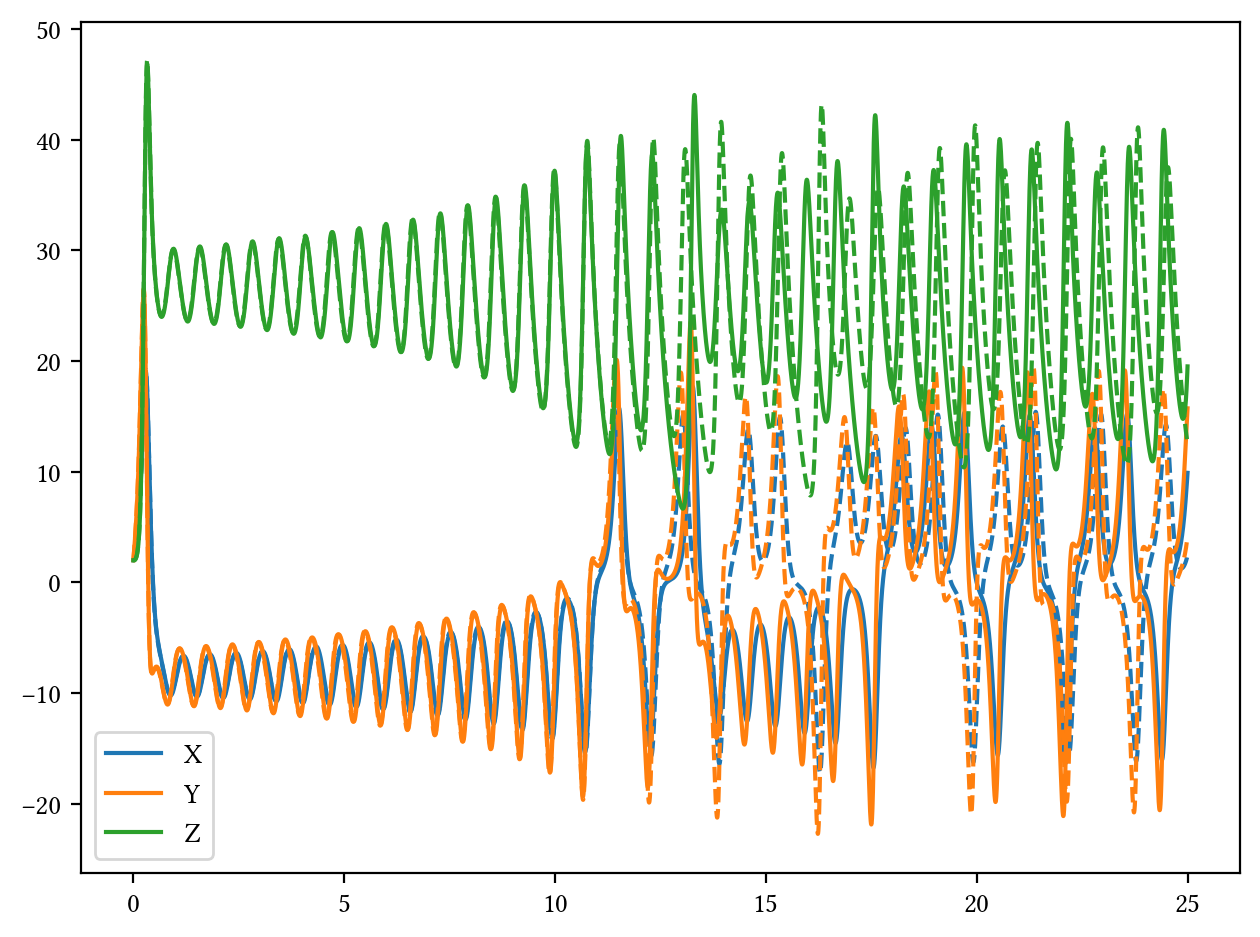

In [5]:
fig, ax = plt.subplots()
ax.plot(t, pred[:, 0], label='X', color='C0')
ax.plot(t, state[:, 0], '--', color='C0')
ax.plot(t, pred[:, 1], label='Y', color='C1')
ax.plot(t, state[:, 1], '--', color='C1')
ax.plot(t, pred[:, 2], label='Z', color='C2')
ax.plot(t, state[:, 2], '--', color='C2')
ax.legend()
fig.tight_layout()
plt.show()

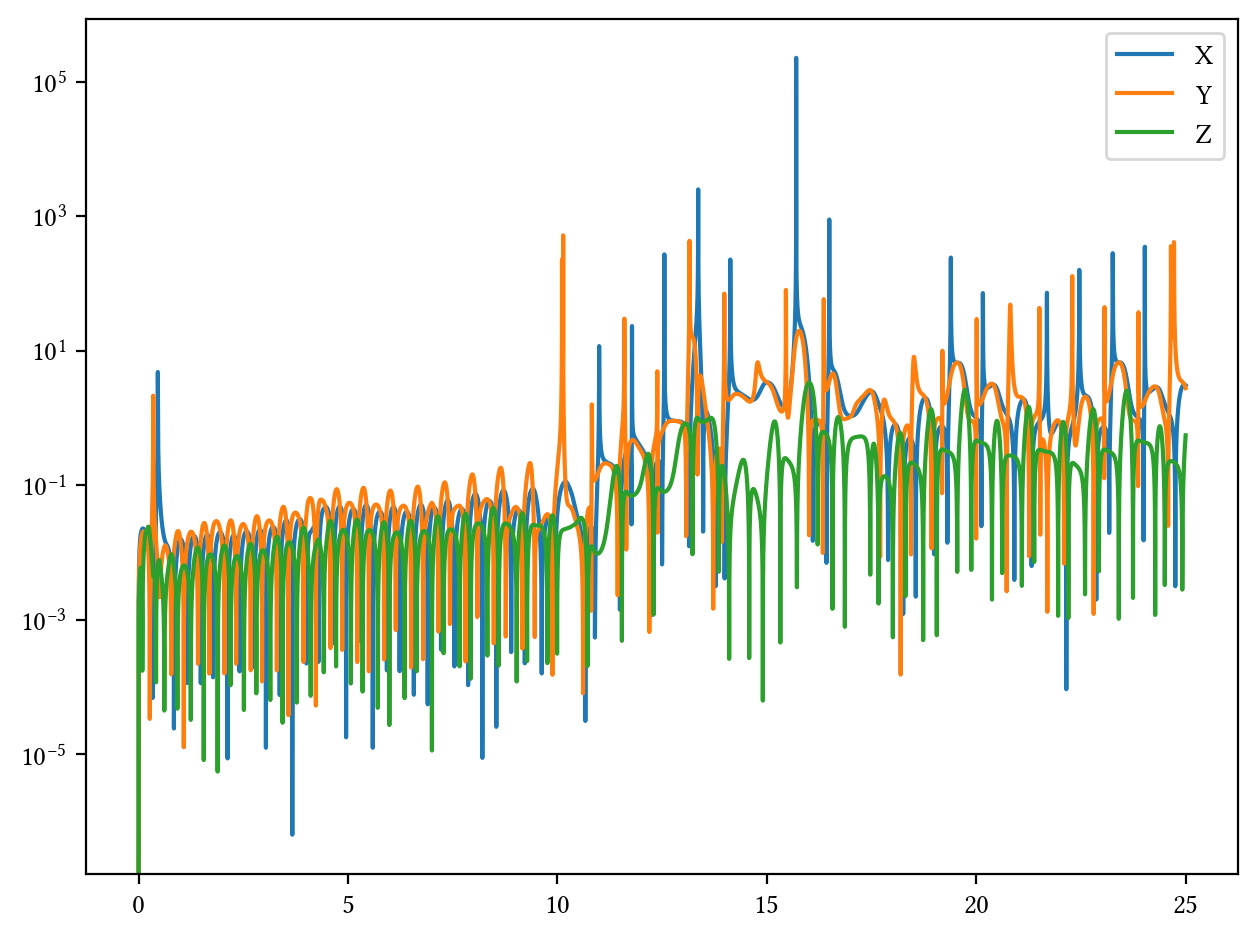

In [6]:
fig, ax = plt.subplots()
ax.plot(t, abs(pred[:, 0] - state[:, 0]) / abs(state[:, 0]), label='X', color='C0')
ax.plot(t, abs(pred[:, 1] - state[:, 1]) / abs(state[:, 1]), label='Y', color='C1')
ax.plot(t, abs(pred[:, 2] - state[:, 2]) / abs(state[:, 2]), label='Z', color='C2')
ax.legend()
ax.set(yscale='log')
fig.tight_layout()
plt.show()

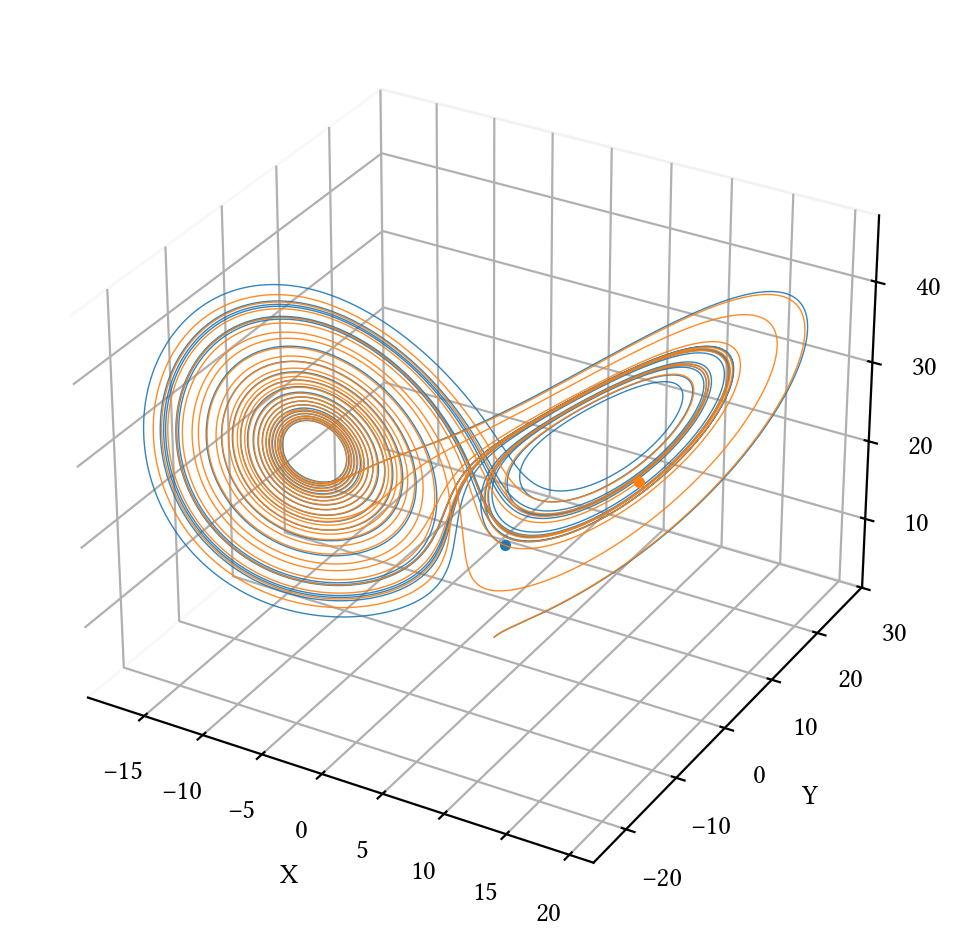

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

line, = ax.plot(state[:, 0], state[:, 1], state[:, 2], 'C0', lw=0.5, alpha=0.9)
point, = ax.plot(state[0, 0], state[0, 1], state[0, 2], 'C0.')
line2, = ax.plot(pred[:, 0], pred[:, 1], pred[:, 2], 'C1', lw=0.5, alpha=0.9)
point2, = ax.plot(pred[0, 0], pred[0, 1], pred[0, 2], 'C1.')

ax.set(xlabel='X', ylabel='Y', zlabel='Z')
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
# ax.set_box_aspect(None, zoom=0.9)
fig.tight_layout()

def animate(frame):
    frame *= 10
    # ax.view_init(azim=frame * 0.02)
    line.set_data(state[:frame, 0], state[:frame, 1])
    line.set_3d_properties(state[:frame, 2])
    line2.set_data(pred[:frame, 0], pred[:frame, 1])
    line2.set_3d_properties(pred[:frame, 2])
    point.set_data([state[frame, 0]], [state[frame, 1]])
    point.set_3d_properties([state[frame, 2]])
    point2.set_data([pred[frame, 0]], [pred[frame, 1]])
    point2.set_3d_properties([pred[frame, 2]])
    return line, point, line2, point2

anim = animation.FuncAnimation(fig, animate, frames=len(state)//10, blit=True)
anim.save('../figures/lorenz_3d_comparison.mp4', fps=60, dpi=300, writer='ffmpeg')

In [8]:
# from IPython.display import HTML
# HTML(anim.to_jshtml())